**Name:** Rohit Raj <br />
**Roll No:** 210874
***

Q.1 Write the expression for the gradient 
 $$
\nabla \ln \pi(A_t | S_t, \theta) 
 $$
for the policy shown above (write
in 𝐿A𝑇E𝑋 in the jupyter-notebook submission) [2 Marks]

Ans:  The gradient of the log-probability is calculated as:

$$
\nabla \ln \pi(A_t | S_t, \theta) = x(S_t, A_t) - \sum_{b} \pi(b | S_t, \theta) x(S_t, b)
$$
where,
$$
x(s_t, a_t) = 
\begin{cases} 
\begin{bmatrix} s_t & 0 \end{bmatrix}^T & \text{if } a_t = 0 \\
\begin{bmatrix} 0 & s_t \end{bmatrix}^T & \text{if } a_t = 1
\end{cases}
$$


Q.2  Implement REINFORCE algorithm with appropriate choice of algorithm parameters [5 Marks]


In [12]:
!pip install gymnasium

In [13]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Define the environment
env = gym.make('CartPole-v1')
env.reset()
# env.render()

# Define algorithm parameters
alpha = 0.01  # Step size
gamma = 0.99  # Discount factor
num_episodes = 1000

# Initialize policy parameters
theta = np.zeros((2, 4))  # 2x4 matrix for linear policy
# d_theta=[]
def choose_action(state, theta):
    logits = np.dot(theta, state.T)
    action_probs = softmax(logits)
    action = np.random.choice([0, 1], p=action_probs)
    return action, action_probs

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max to avoid numerical instability
    return exp_x / np.sum(exp_x)

episode_reward=[]
G_not=[]
# REINFORCE algorithm
for episode in range(num_episodes):
    # Generate an episode
    states = []
    actions = []
    rewards = []
    state, _ = env.reset()

    done = False
    while not done:
        action, _ = choose_action(state, theta)
        next_state, reward, done, _, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state
        if(len(states)>=500):
            break

    # Calculate returns and update policy parameters

    T = len(states)

    for t in range(T):
        G=0
        x=np.zeros((2,4))
        d_theta=np.zeros((2,4))
        G = sum(gamma**(k - t - 1) * rewards[k] for k in range(t, T))
        action=actions[t]
        x[action]=states[t]
        # Compute gradient of log-probability
        action_probs = softmax(np.dot(theta, states[t].T))
        d_theta = x - np.outer(action_probs, states[t])
    
        theta += alpha * gamma**t * G * d_theta
        
    # Print total reward for the episode
    total_reward = sum(rewards)
    g_0=((1- gamma**T)/(1-gamma))
    G_not.append(g_0)
    
    episode_reward.append(total_reward)
    print("Episode {}: Total Reward = {}".format(episode+1, total_reward))
    print("Final Policy Parameter:")
    # print(theta)


    
    

Episode 1: Total Reward = 12.0
Final Policy Parameter:
Episode 2: Total Reward = 9.0
Final Policy Parameter:
Episode 3: Total Reward = 27.0
Final Policy Parameter:
Episode 4: Total Reward = 17.0
Final Policy Parameter:
Episode 5: Total Reward = 15.0
Final Policy Parameter:
Episode 6: Total Reward = 14.0
Final Policy Parameter:
Episode 7: Total Reward = 34.0
Final Policy Parameter:
Episode 8: Total Reward = 19.0
Final Policy Parameter:
Episode 9: Total Reward = 36.0
Final Policy Parameter:
Episode 10: Total Reward = 11.0
Final Policy Parameter:
Episode 11: Total Reward = 32.0
Final Policy Parameter:
Episode 12: Total Reward = 16.0
Final Policy Parameter:
Episode 13: Total Reward = 13.0
Final Policy Parameter:
Episode 14: Total Reward = 13.0
Final Policy Parameter:
Episode 15: Total Reward = 13.0
Final Policy Parameter:
Episode 16: Total Reward = 13.0
Final Policy Parameter:
Episode 17: Total Reward = 20.0
Final Policy Parameter:
Episode 18: Total Reward = 16.0
Final Policy Parameter:
Ep

Q.3 Plot the training rewards over 1000 episodes [2 Marks]

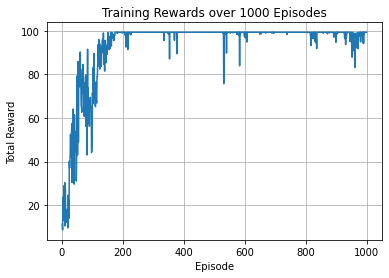

In [15]:
plt.plot(np.arange(1, num_episodes + 1), G_not)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Rewards over 1000 Episodes')
plt.grid(True)
plt.show()

Q.4 Test the trained policy and compute the average reward over 5 episodes [1 Marks] 

In [16]:

env=gym.make('CartPole-v1')
env.reset()
# Test the trained policy
test_episodes = 5
test_rewards = []

for _ in range(test_episodes):
    state, _ = env.reset()
    step = 0
    done = False
    
    while not done:
        action, _ = choose_action(state, theta)  # Ensure state is a NumPy array
        next_state, reward, done, _, _ = env.step(action)
        step += 1
        state = next_state
        if(step >=500):
            break

    test_rewards.append(step)
    print(f"Test Episode: Total Reward = {step}")

# Compute and print average reward
avg_reward = np.mean(test_rewards)
print(f"Average Reward over {test_episodes} test episodes: {avg_reward}")

# Close the environment
env.close()

Test Episode: Total Reward = 500
Test Episode: Total Reward = 500
Test Episode: Total Reward = 500
Test Episode: Total Reward = 500
Test Episode: Total Reward = 500
Average Reward over 5 test episodes: 500.0


Q.5 Implement REINFORCE algorithm with baseline as shown in Figure 2 with appropriate
choice of algorithm parameters. Take the state value function as a linear function of the
state [7 Marks]
$$
\hat{v}(s, w) = w^\top s
$$


In [19]:
import numpy as np
import gymnasium as gym

env = gym.make('CartPole-v1')
env.reset()

# Define algorithm parameters
gamma = 0.99  # Discount factor
num_episodes = 1000
alpha_theta = 0.01
alpha_baseline = 0.01

theta1 = np.zeros((2, 4))
baseline = np.zeros(4)

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max to avoid numerical instability
    return exp_x / np.sum(exp_x)

# Function to choose action according to policy
def choose_action(state):
    logits = np.dot(theta1, state)
    action_probs = softmax(logits)
    action = np.random.choice([0, 1], p=action_probs)
    return action, action_probs

episode_reward = []
G_not_1=[]

# REINFORCE algorithm with baseline
for episode in range(num_episodes):
    # Generate an episode
    states = []
    actions = []
    rewards = []
    state, _ = env.reset()
    done = False
    while not done:
        action, _ = choose_action(state)
        next_state, reward, done, _, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state
        if len(states) >= 500:
            break

    T_1=len(states)

    # Calculate returns and update policy parameters and baseline
    # G = 0
    for t in range(T_1):
        G=0
        x1=np.zeros((2,4))
        G = sum(gamma**(k - t - 1) * rewards[k] for k in range(t, T_1))
        TD = G - np.dot(baseline.T, states[t])
        action=actions[t]
        x1[action]=states[t]
        # Compute gradient of log-probability
        action_probs1 = softmax(np.dot(theta1, states[t].T))
        d_theta1 = x1 - np.outer(action_probs1, states[t])
        baseline += alpha_baseline * TD * states[t]
        theta1 += alpha_theta* gamma**t * TD * d_theta1

    # Print total reward for the episode
    g_0_1=((1- gamma**T_1)/(1-gamma))
    G_not_1.append(g_0_1)
    total_reward = sum(rewards)
    episode_reward.append(total_reward)
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")



Episode 1: Total Reward = 32.0
Episode 2: Total Reward = 44.0
Episode 3: Total Reward = 26.0
Episode 4: Total Reward = 15.0
Episode 5: Total Reward = 44.0
Episode 6: Total Reward = 24.0
Episode 7: Total Reward = 20.0
Episode 8: Total Reward = 49.0
Episode 9: Total Reward = 14.0
Episode 10: Total Reward = 76.0
Episode 11: Total Reward = 80.0
Episode 12: Total Reward = 144.0
Episode 13: Total Reward = 152.0
Episode 14: Total Reward = 128.0
Episode 15: Total Reward = 233.0
Episode 16: Total Reward = 154.0
Episode 17: Total Reward = 245.0
Episode 18: Total Reward = 297.0
Episode 19: Total Reward = 177.0
Episode 20: Total Reward = 64.0
Episode 21: Total Reward = 93.0
Episode 22: Total Reward = 94.0
Episode 23: Total Reward = 90.0
Episode 24: Total Reward = 74.0
Episode 25: Total Reward = 108.0
Episode 26: Total Reward = 153.0
Episode 27: Total Reward = 82.0
Episode 28: Total Reward = 209.0
Episode 29: Total Reward = 129.0
Episode 30: Total Reward = 83.0
Episode 31: Total Reward = 107.0
Epis

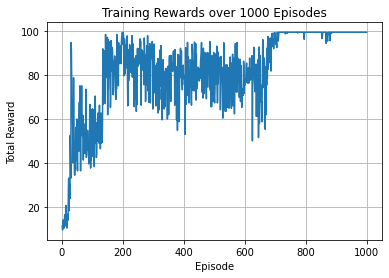

In [ ]:
plt.plot(np.arange(1, num_episodes + 1), G_not_1)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Rewards over 1000 Episodes')
plt.grid(True)
plt.show()


Q.6 Compare and plot the training performance for both the algorithms [3 Marks]

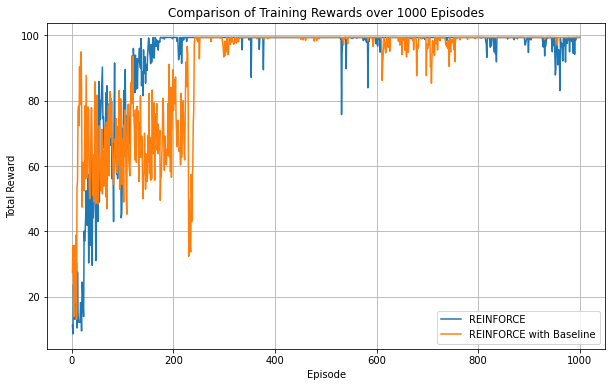

In [22]:
# Plot both sets of data on the same figure
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_episodes + 1), G_not, label='REINFORCE')
plt.plot(np.arange(1, num_episodes + 1), G_not_1, label='REINFORCE with Baseline')

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Comparison of Training Rewards over 1000 Episodes')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()